1. Environment setup

In [1]:
import pandas as pd
import numpy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

import warnings # current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")

2. Load and understanding data

2.1 Loading the dataset

In [5]:
#load dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
iris = pd.read_csv(url, header=None, names=[
                        'sepallength', 'sepalwidth', 'petallength', 'petalwidth', 'class'])

2.2 Understanding the dataset

2.2.1 Preview data

In [3]:
#preview data
display(iris.sample(3))

,sepallength,sepalwidth,petallength,petalwidth,class
64,5.6,2.9,3.6,1.3,Iris-versicolor
70,5.9,3.2,4.8,1.8,Iris-versicolor
130,7.4,2.8,6.1,1.9,Iris-virginica


2.2.2 Description of dataset

In [ ]:
#Description of Data
display(iris.describe().T)

,count,mean,std,min,25%,50%,75%,max
sepallength,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepalwidth,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
petallength,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
petalwidth,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


In [ ]:
2.2.3 Description of class

In [ ]:
#Flower distribution
display(iris.groupby('class').size())

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

2.2.4 Shape of Data

In [ ]:
#Data Shape
display(iris.shape)

(150, 5)

3. Data visualization

The visualization techniques provide imagery representation of Iris species and feature It is used to determine correlations between the X and Y variables (dependent and independent variables).
Now, we are going to visualize the dataset in two ways such as Boxplot, and pairwise joint plot distribution (scatter plot).

3.1 Boxplot

<Axes: xlabel='class', ylabel='petalwidth'>

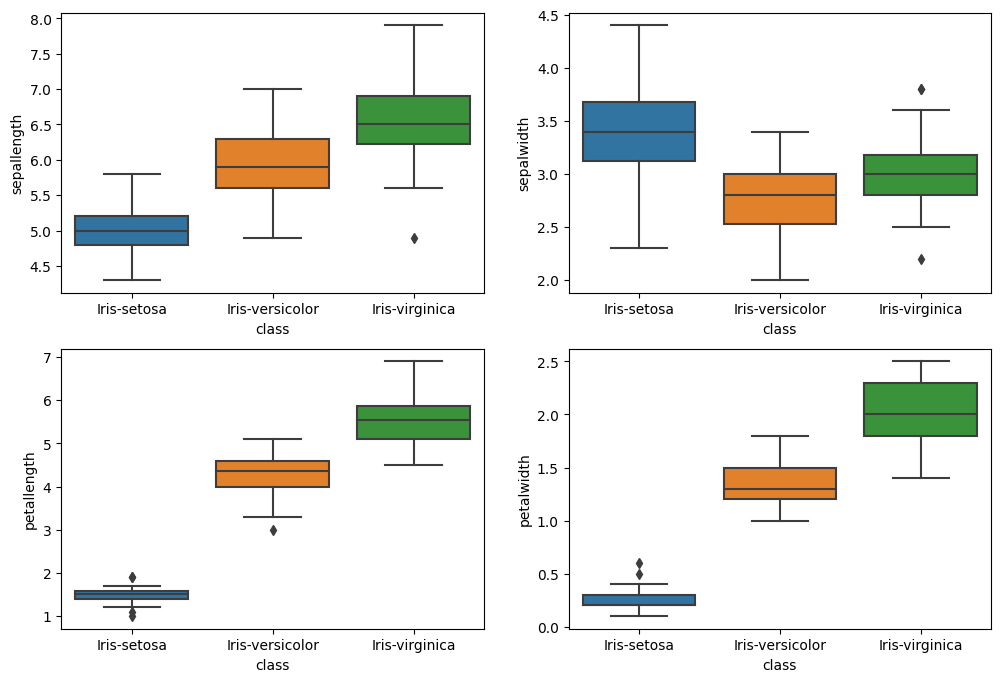

In [7]:
#Boxplot
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.boxplot(x='class',y='sepallength',data=iris)
plt.subplot(2,2,2)
sns.boxplot(x='class',y='sepalwidth',data=iris)
plt.subplot(2,2,3)
sns.boxplot(x='class',y='petallength',data=iris)
plt.subplot(2,2,4)
sns.boxplot(x='class',y='petalwidth',data=iris)



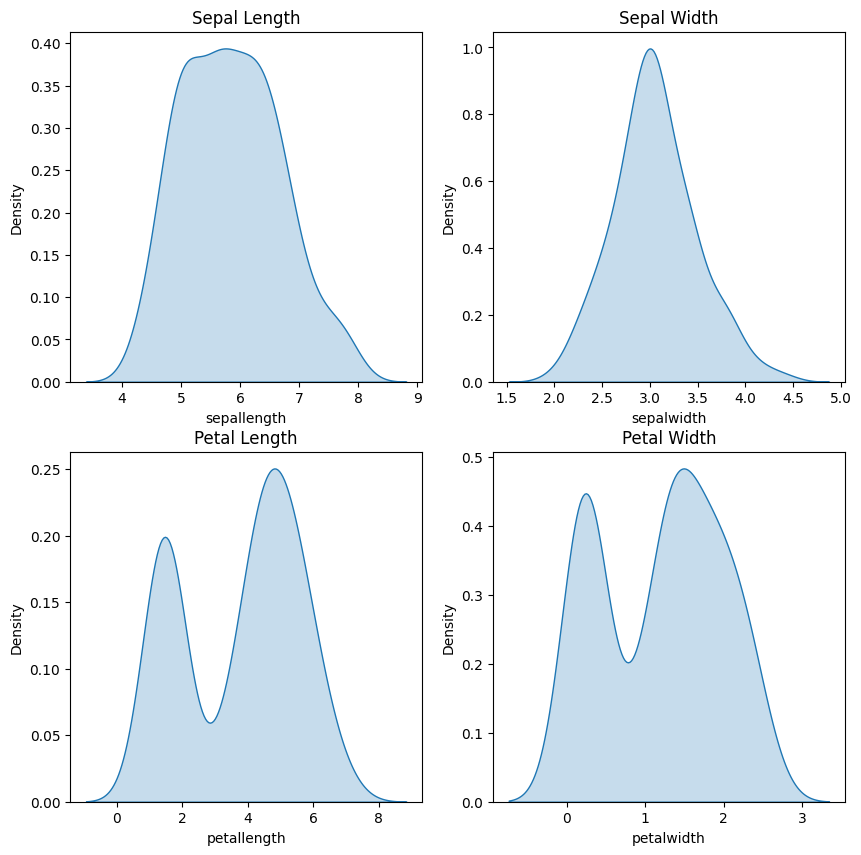

In [ ]:
# kernel density estimation (KDE) plot
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

# Plot the density plot and histogram for each feature
sns.kdeplot(ax=axs[0, 0], data=iris, x="sepallength", fill=True)
sns.kdeplot(ax=axs[0, 1], data=iris, x="sepalwidth", fill=True)
sns.kdeplot(ax=axs[1, 0], data=iris, x="petallength", fill=True)
sns.kdeplot(ax=axs[1, 1], data=iris, x="petalwidth", fill=True)

# Add titles to the subplots
axs[0, 0].set_title("Sepal Length")
axs[0, 1].set_title("Sepal Width")
axs[1, 0].set_title("Petal Length")
axs[1, 1].set_title("Petal Width")

# Display the plots
plt.show()

<Axes: xlabel='class', ylabel='petalwidth'>

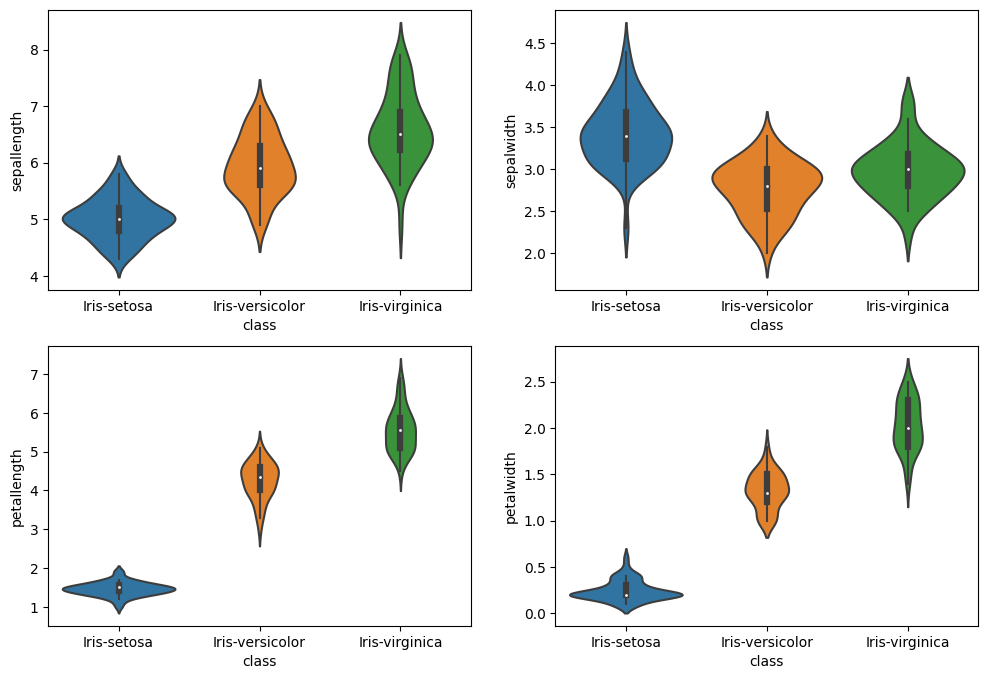

In [ ]:
#Violin plot
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.violinplot(x='class',y='sepallength',data=iris)
plt.subplot(2,2,2)
sns.violinplot(x='class',y='sepalwidth',data=iris)
plt.subplot(2,2,3)
sns.violinplot(x='class',y='petallength',data=iris)
plt.subplot(2,2,4)
sns.violinplot(x='class',y='petalwidth',data=iris)

In [ ]:
3.2 Pair plot

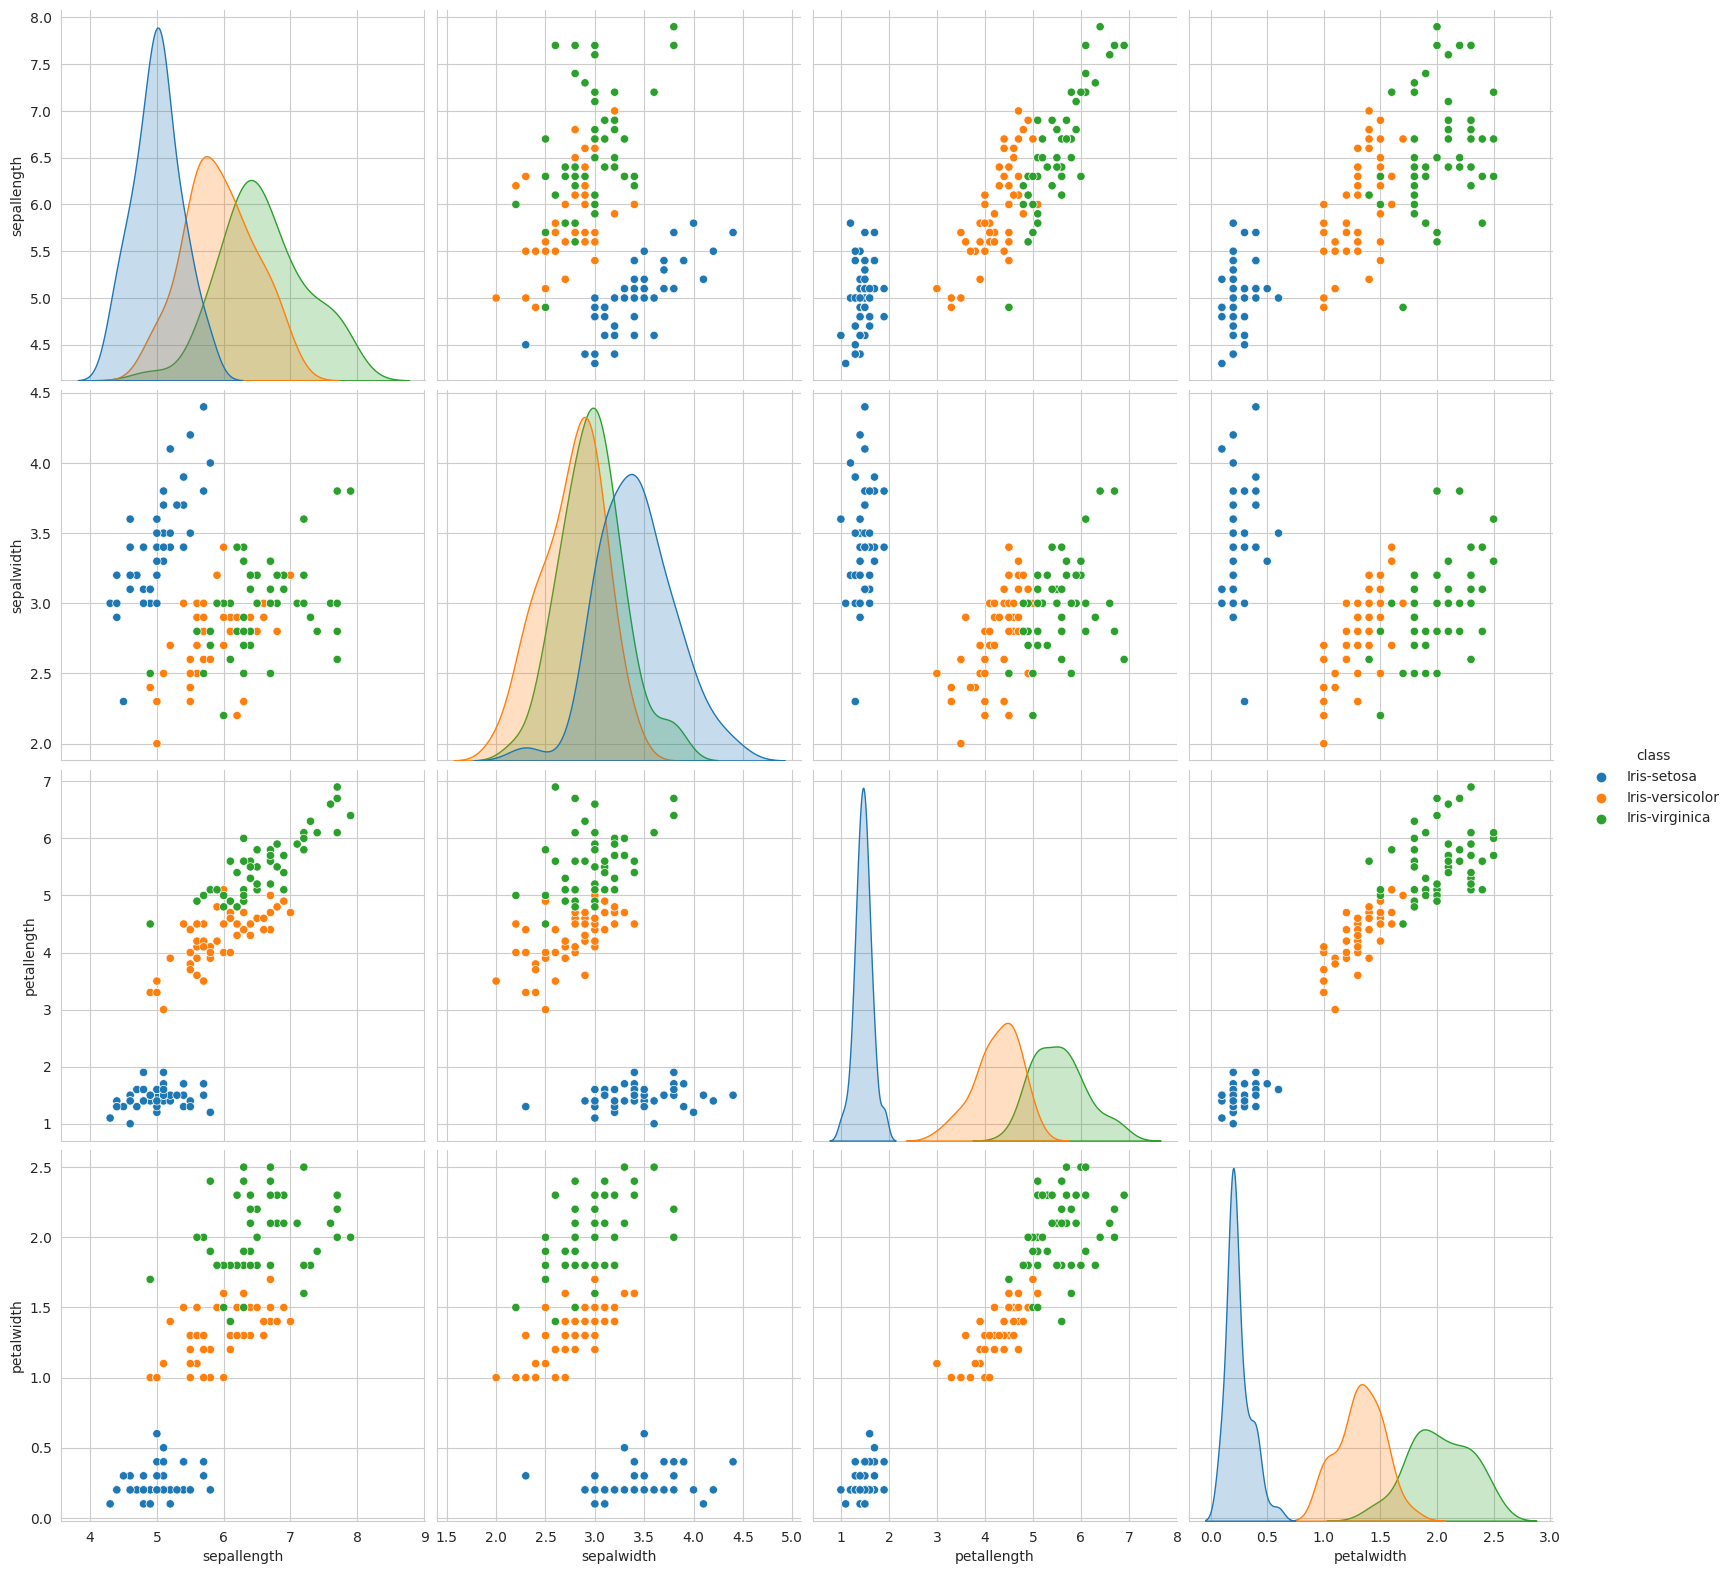

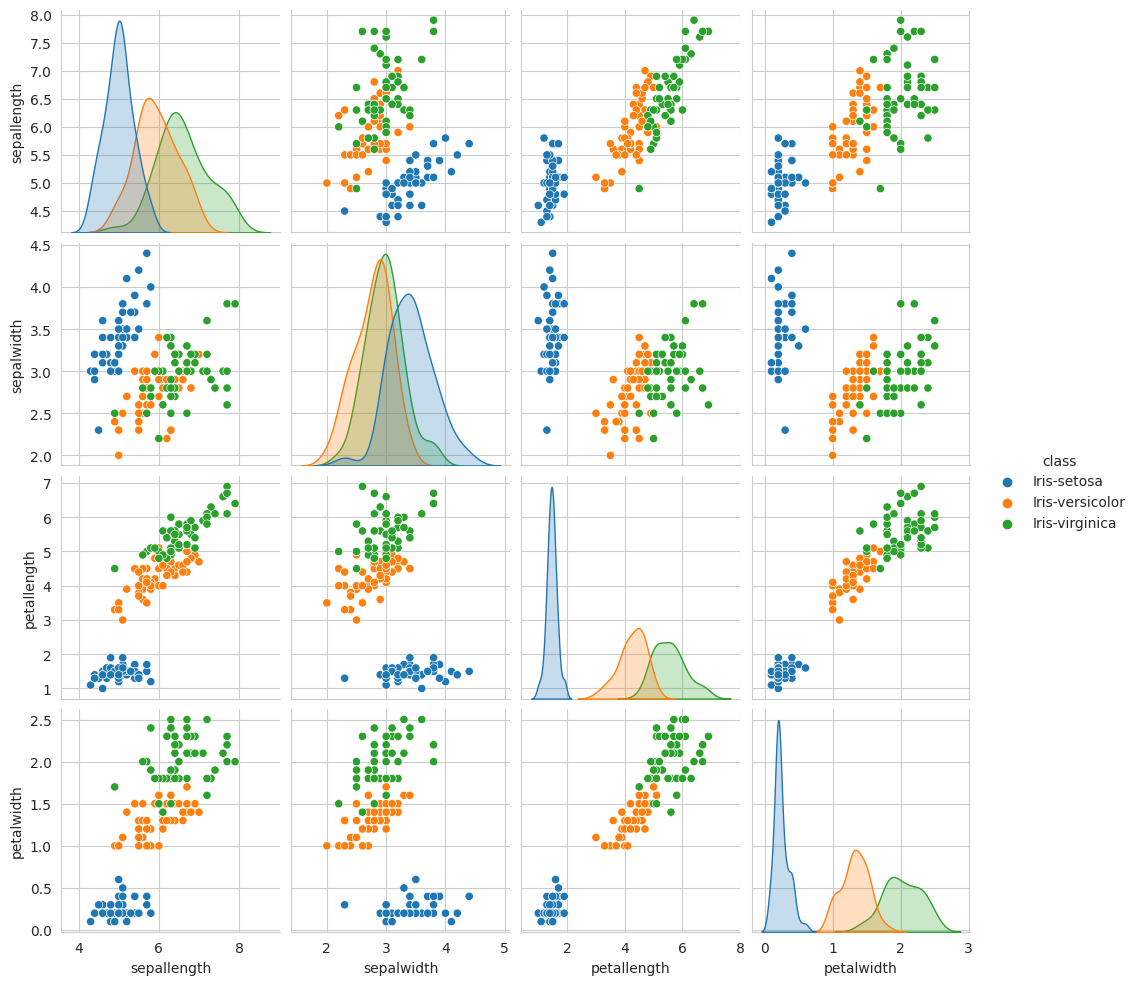

In [ ]:
#Pairwise joint plot (scatter matrix)
sns.pairplot(iris, hue='class', size=4, diag_kind="kde")
sns.pairplot(iris,hue='class')

In [ ]:
iris.dtypes

sepallength    float64
sepalwidth     float64
petallength    float64
petalwidth     float64
class           object
dtype: object

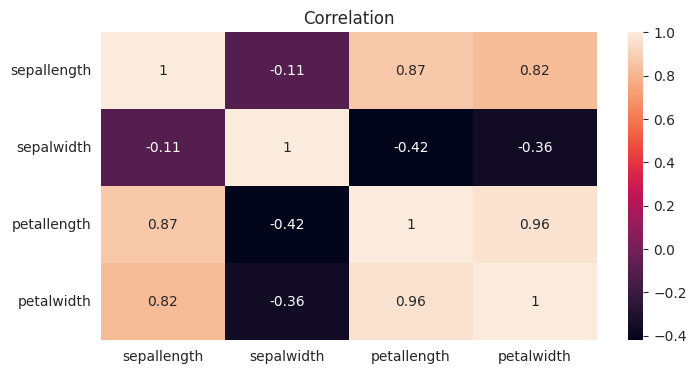

In [ ]:
#correlation
plt.figure(figsize=(8,4))
sns.heatmap(iris.select_dtypes('float64').corr(),annot=True)
plt.title('Correlation')
plt.show()

In [ ]:
#Splitting dataset
X = iris.iloc[:,:-1].values
y = iris.iloc[:,-1].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1,shuffle=True)

In [ ]:
#Feature Scaling for Classification
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
#Feature Scaling for Clustering¶
sc = StandardScaler()
X = sc.fit_transform(X)

In [ ]:
###Classification Models
##Logistic Regression
#Training the model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

Accuracy =  96.67  %


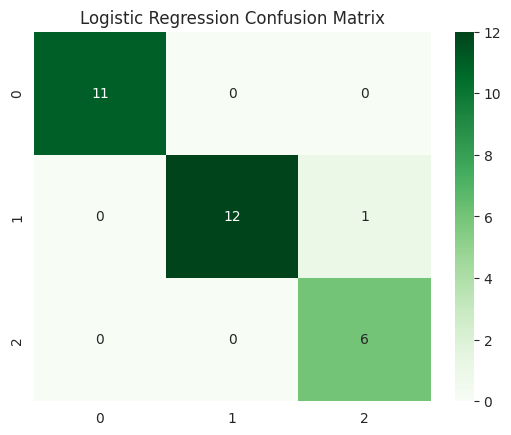

In [ ]:
#Evaluating the model
from sklearn.metrics import confusion_matrix,accuracy_score
y_pred = lr.predict(X_test)
lr_train_acc = round(accuracy_score(y_train,lr.predict(X_train))*100,2)
lr_test_acc = round(accuracy_score(y_test,y_pred)*100,2)
print('Accuracy = ',lr_test_acc ,' %')
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,cmap='Greens')
plt.title('Logistic Regression Confusion Matrix');

In [ ]:
###K-Nearest-Neighbour
##Training the model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

Accuracy =  100.0  %


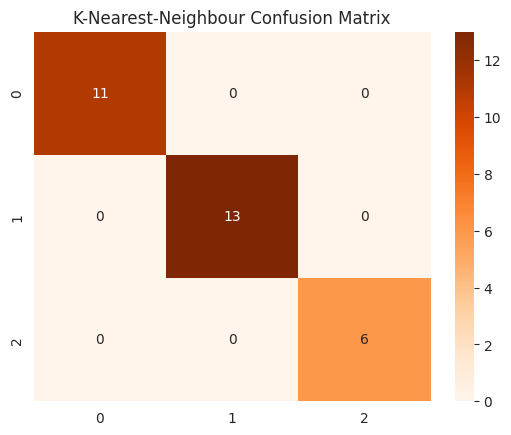

In [ ]:
#Evaluating the model
y_pred = knn.predict(X_test)
knn_train_acc = round(accuracy_score(y_train,knn.predict(X_train))*100,2)
knn_test_acc = round(accuracy_score(y_test,y_pred)*100,2)
print('Accuracy = ',knn_test_acc ,' %')
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,cmap='Oranges')
plt.title('K-Nearest-Neighbour Confusion Matrix');

In [ ]:
###Naive Bayes
##Training the model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train,y_train)

GaussianNB()

Accuracy =  96.67  %


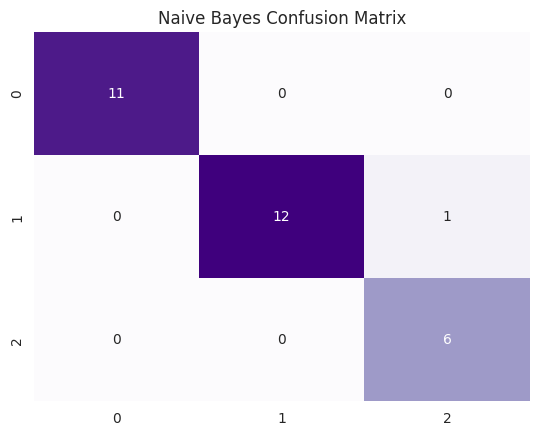

In [ ]:
#Evaluating the model
y_pred = nb.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
nb_train_acc = round(accuracy_score(y_train,nb.predict(X_train))*100,2)
nb_test_acc = round(accuracy_score(y_test,y_pred)*100,2)
print('Accuracy = ' , nb_test_acc,' %')
sns.heatmap(cm,annot=True, fmt='d', cmap='Purples', cbar=False,)
plt.title('Naive Bayes Confusion Matrix');

In [ ]:
###Decision Tree
##Training the model
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X_train,y_train)

DecisionTreeClassifier()

Accuracy =  96.67  %


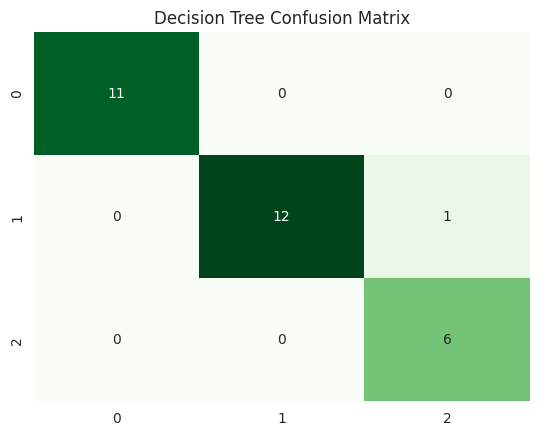

In [ ]:
#Evaluating the model
y_pred = tree.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
tree_train_acc = round(accuracy_score(y_train,tree.predict(X_train))*100,2)
tree_test_acc = round(accuracy_score(y_test,y_pred)*100,2)
print('Accuracy = ' , tree_test_acc,' %')
sns.heatmap(cm,annot=True, fmt='d', cmap='Greens', cbar=False,)
plt.title('Decision Tree Confusion Matrix');

In [ ]:
###Random Forest
##Training the model
from sklearn.ensemble import RandomForestClassifier
rdm_frst = RandomForestClassifier(n_estimators=100)
rdm_frst.fit(X_train,y_train)

RandomForestClassifier()

Accuracy =  96.67  %


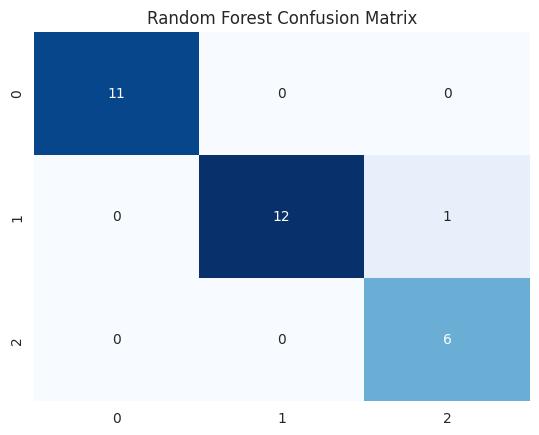

In [ ]:
#Evaluating the model
y_pred = rdm_frst.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
rdm_train_acc = round(accuracy_score(y_train,rdm_frst.predict(X_train))*100,2)
rdm_test_acc = round(accuracy_score(y_test,y_pred)*100,2)
print('Accuracy = ' , rdm_test_acc,' %')
sns.heatmap(cm,annot=True, fmt='d', cmap='Blues', cbar=False,)
plt.title('Random Forest Confusion Matrix');

In [ ]:
###Comparing Classification Models
models = pd.DataFrame({
    'Model': [
        'Logistic Regression','K Nearest Neighbors','Gaussian Naive Bayes','Decision Tree',
        'Random Forest'],
    'Training Accuracy': [
        lr_train_acc,knn_train_acc,nb_train_acc,tree_train_acc,rdm_train_acc],
    'Model Accuracy Score': [
       lr_test_acc,knn_test_acc,nb_test_acc,tree_test_acc,rdm_test_acc
    ]})
models.sort_values(by='Training Accuracy', ascending=False)

,Model,Training Accuracy,Model Accuracy Score
3,Decision Tree,100.0,96.67
4,Random Forest,100.0,96.67
0,Logistic Regression,97.5,96.67
1,K Nearest Neighbors,95.0,100.00
2,Gaussian Naive Bayes,95.0,96.67


In [ ]:
models.sort_values(by='Model Accuracy Score', ascending=False).style.background_gradient(
        cmap='Oranges_r')

,Model,Training Accuracy,Model Accuracy Score
1,K Nearest Neighbors,95.000000,100.000000
0,Logistic Regression,97.500000,96.670000
2,Gaussian Naive Bayes,95.000000,96.670000
3,Decision Tree,100.000000,96.670000
4,Random Forest,100.000000,96.670000


Supported values for cmap are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone'.